In [1]:
#Transform Dependencies
import pandas as pd
import numpy as np
import datetime as dt
import dateutil.parser
import re
import json
from pprint import pprint

#Visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, Table, MetaData

In [2]:
from config import rds_connection_string
engine = create_engine(f'mysql+mysqlconnector://{rds_connection_string}')
session = Session(engine)
inspector = inspect(engine)
inspector.get_table_names()
metadata = MetaData(bind=None)

# Launches (No Nan)

In [3]:
launch_log = pd.read_sql_query('SELECT * FROM launch_log;', con=engine).dropna()
launch_log.head()

,launch,launch_date_utc,COSPAR,pl_name,orig_pl_name,SATCAT,lv_type,lv_sn,site,suc,Ref,launch_date
0,1957 ALP,1957 Oct 4 1928:34,1957 ALP 2,1-y ISZ,PS-1,S00002,Sputnik 8K71PS,M1-PS,NIIP-5 LC1,S,Energiya,1957-10-04
1,1957 BET,1957 Nov 3 0230:42,1957 BET 1,2-y ISZ,PS-2,S00003,Sputnik 8K71PS,M1-2PS,NIIP-5 LC1,S,Grahn-WWW,1957-11-03
2,1958 ALP,1958 Feb 1 0347:56,1958 ALP,Explorer 1,Explorer 1,S00004,Jupiter C,RS-29 UE,CC LC26A,S,JunoFam,1958-02-01
3,1958 BET,1958 Mar 17 1215:41,1958 BET 2,Vanguard I,Vanguard Test Satellite,S00005,Vanguard,TV-4,CC LC18A,S,SP-4202,1958-03-01
4,1958 GAM,1958 Mar 26 1738:03,1958 GAM,Explorer 3,Explorer 3,S00006,Jupiter C,RS-24 UT,CC LC5,S,JunoFam,1958-03-02


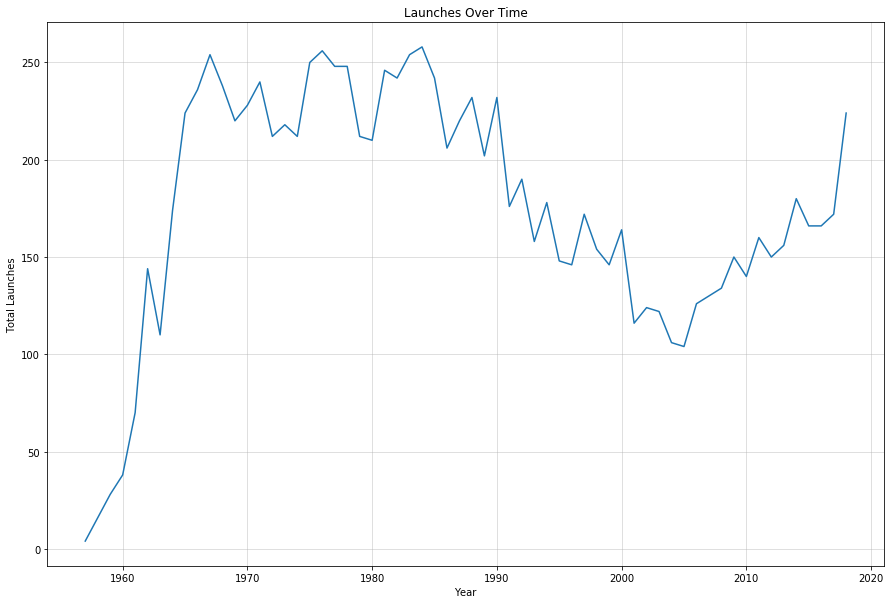

In [4]:
launch_log["Year"] = launch_log['launch_date'].map(lambda x: int(x.strftime('%Y')))
launch_log2 = launch_log[launch_log["Year"] != 2019]

x_axis = launch_log2.groupby('Year')['Year'].max()
launches = launch_log2.groupby('Year')['Year'].count()
plt.figure(figsize = (15,10))

plt.plot(x_axis, launches)
plt.xlabel("Year")
plt.ylabel("Total Launches")
plt.grid(True,alpha=.5)

plt.title("Launches Over Time")

# plt.savefig('.\\Output\\launchessovertime.png')
plt.show()

# Total Launches

In [5]:
launch_log = pd.read_sql_query('SELECT * FROM launch_log;', con=engine)
launch_log.head()

,launch,launch_date_utc,COSPAR,pl_name,orig_pl_name,SATCAT,lv_type,lv_sn,site,suc,Ref,launch_date
0,1957 ALP,1957 Oct 4 1928:34,1957 ALP 2,1-y ISZ,PS-1,S00002,Sputnik 8K71PS,M1-PS,NIIP-5 LC1,S,Energiya,1957-10-04
1,1957 BET,1957 Nov 3 0230:42,1957 BET 1,2-y ISZ,PS-2,S00003,Sputnik 8K71PS,M1-2PS,NIIP-5 LC1,S,Grahn-WWW,1957-11-03
2,1958 ALP,1958 Feb 1 0347:56,1958 ALP,Explorer 1,Explorer 1,S00004,Jupiter C,RS-29 UE,CC LC26A,S,JunoFam,1958-02-01
3,1958 BET,1958 Mar 17 1215:41,1958 BET 2,Vanguard I,Vanguard Test Satellite,S00005,Vanguard,TV-4,CC LC18A,S,SP-4202,1958-03-01
4,1958 GAM,1958 Mar 26 1738:03,1958 GAM,Explorer 3,Explorer 3,S00006,Jupiter C,RS-24 UT,CC LC5,S,JunoFam,1958-03-02


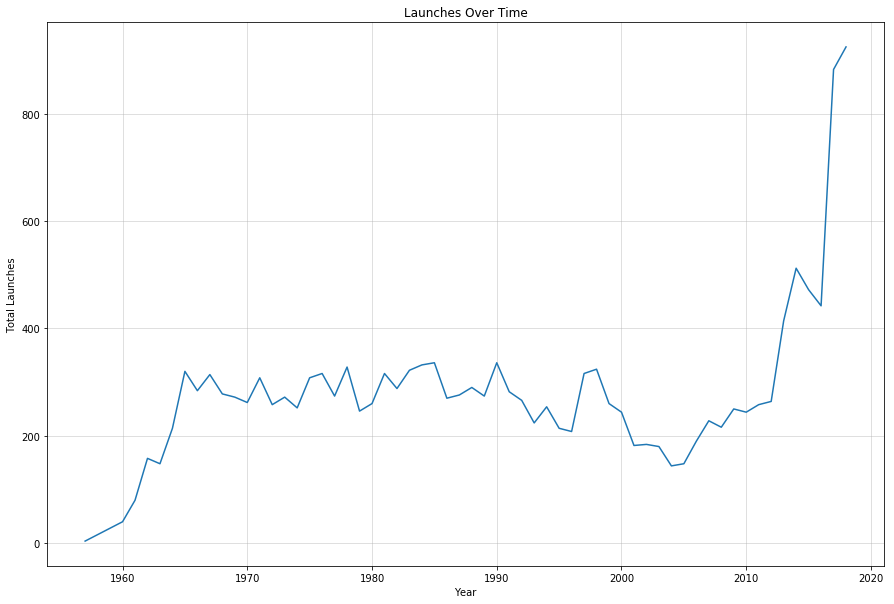

In [6]:
launch_log["Year"] = launch_log['launch_date'].map(lambda x: int(x.strftime('%Y')))
launch_log2 = launch_log[launch_log["Year"] != 2019]

x_axis = launch_log2.groupby('Year')['Year'].max()
launches = launch_log2.groupby('Year')['Year'].count()
plt.figure(figsize = (15,10))

plt.plot(x_axis, launches)
plt.xlabel("Year")
plt.ylabel("Total Launches")
plt.grid(True,alpha=.5)

plt.title("Launches Over Time")

# plt.savefig('.\\Output\\launchessovertime.png')
plt.show()

# Launces over time and total launches by top 5 countries

In [7]:
satellites = pd.read_sql_query('SELECT * FROM ucs_satellites;', con=engine)
satellites["Year"] = satellites['launch_date'].map(lambda x: int(x.strftime('%Y')))
satellites = satellites[satellites["Year"] != 2019]


satellitesc = satellites.groupby(["country","Year"])["Year"].count()

# Convert to DataFrame
satellitesdf = pd.DataFrame(satellitesc)

# # Minor Data Munging to Re-Format the Data Frames
satdf = satellitesdf.unstack(level=0)
satdf.columns = [x[1] for x in satdf.columns]

satdf.head()

,Algeria,Argentina,Australia,Austria,Azerbaijan,Bangladesh,Belarus,Belgium,Bhutan,Bolivia,...,USA/Korea,USA/United Kingdom/Italy,Ukraine,Ukraine/China,United Arab Emirates,United Kingdom,United Kingdom/ESA,Uruguay,Venezuela,Vietnam
Year,,,,,,,,,,,,,,,,,,,,,
1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


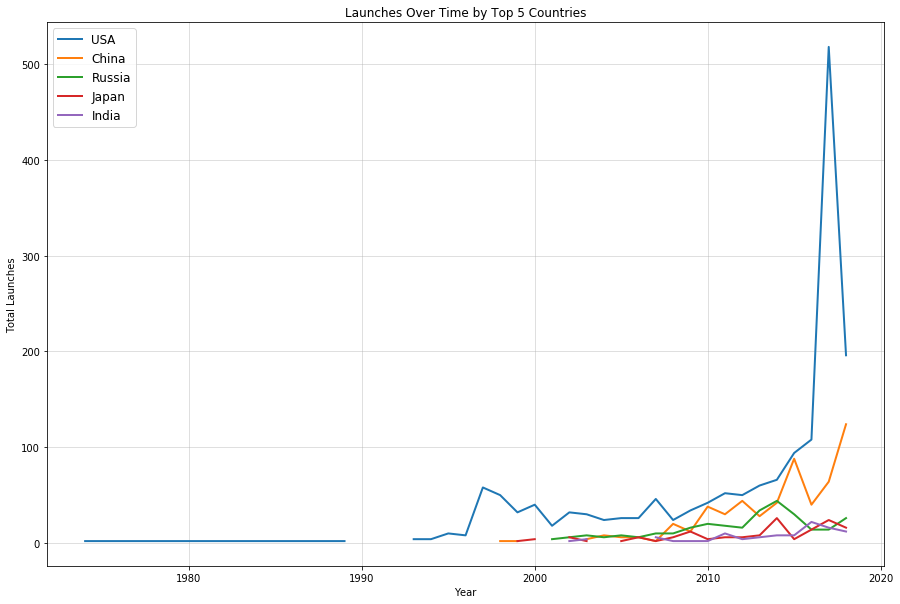

In [8]:
plt.figure(figsize = (15,10))
plt.grid(b=True)

countries = ["USA", "China", "Russia", "Japan","India"]

counter = 0
for column in range(5):
    plt.plot(satdf.index, satdf[countries[counter]],linewidth=2)
    counter +=1

#Incorporate the other graph properties    
plt.xlabel("Year")
plt.ylabel("Total Launches")
plt.grid(True,alpha=.5)
plt.title("Launches Over Time by Top 5 Countries")
plt.legend(loc=2, fontsize="large")

# Save the Figure

plt.show()

In [9]:
x = pd.read_sql_query('SELECT YEAR(launch_date)as Year,country as Country\
                        FROM ucs_satellites\
                        WHERE Country in ("USA","China","Russia","Japan","India");', con=engine).dropna()
x.head()

,Year,Country
0,2018,USA
1,2018,USA
2,2018,USA
3,2018,USA
4,2018,USA


Text(0.5, 1.0, 'Total Launches by Top 5 Countries')

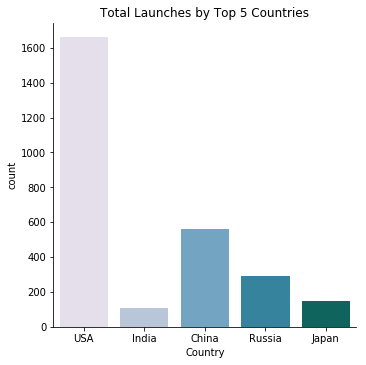

In [10]:
cmap = 'PuBuGn'
sns.catplot("Country",kind="count",data=x,palette=cmap)
plt.title("Total Launches by Top 5 Countries")

In [11]:
purpose = pd.read_sql_query('SELECT * FROM ucs_satellites;', con=engine)
purpose["Year"] = purpose['launch_date'].map(lambda x: int(x.strftime('%Y')))
purpose = purpose[purpose["Year"] != 2019]
#Remove trailing whitespace
purpose["purpose"] = purpose["purpose"].str.strip()

purpose["purpose"].value_counts()

Communications                                    1520
Earth Observation                                 1398
Technology Development                             420
Navigation/Global Positioning                      250
Space Science                                      150
Earth Science                                       46
Technology Demonstration                            24
Navigation/Regional Positioning                     24
Communications/Technology Development               20
Space Observation                                   18
Earth Observation/Technology Development            14
Communications/Maritime Tracking                    10
Earth Observation/Communications                     4
Communications/Navigation                            2
Communications/Earth Observation                     2
Earth Observation/Communications/Space Science       2
Earth Science/Space Science                          2
Technology Development/Educational                   2
Space Scie

In [12]:
purposegroup = purpose.groupby(["purpose","Year"])["Year"].count()

# Convert to DataFrame
purposedf = pd.DataFrame(purposegroup)

# # Minor Data Munging to Re-Format the Data Frames
pdf = purposedf.unstack(level=0)
pdf.columns = [x[1] for x in pdf.columns]

pdf.head()

,Communications,Communications/Earth Observation,Communications/Maritime Tracking,Communications/Navigation,Communications/Technology Development,Earth Observation,Earth Observation/Communications,Earth Observation/Communications/Space Science,Earth Observation/Space Science,Earth Observation/Technology Development,...,Earth Science/Earth Observation,Earth Science/Space Science,Navigation/Global Positioning,Navigation/Regional Positioning,Space Observation,Space Science,Space Science/Technology Development,Technology Demonstration,Technology Development,Technology Development/Educational
Year,,,,,,,,,,,,,,,,,,,,,
1974,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
1991,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


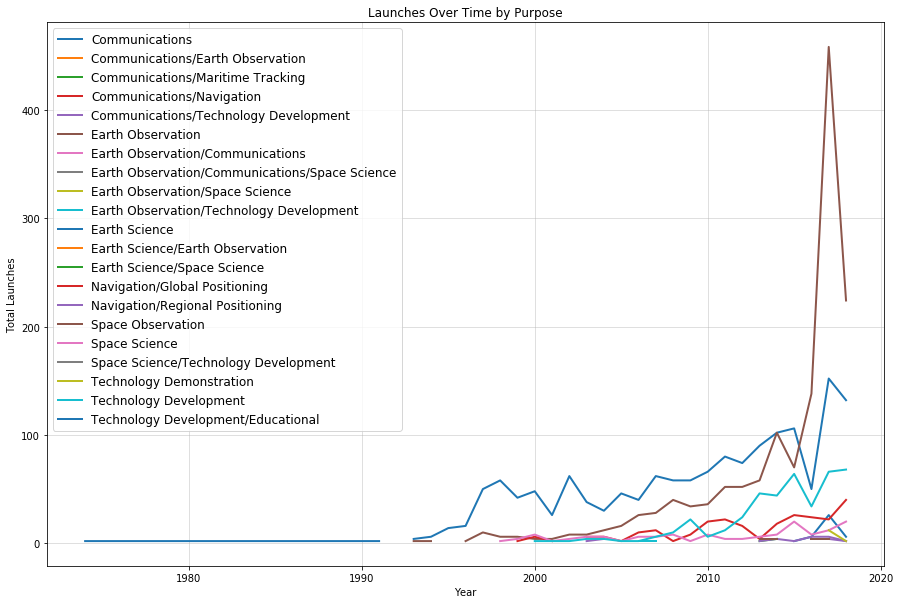

In [13]:
plt.figure(figsize = (15,10))
plt.grid(b=True)

for column in pdf:
    plt.plot(pdf.index, pdf[column],linewidth=2)

#Incorporate the other graph properties    
plt.xlabel("Year")
plt.ylabel("Total Launches")
plt.grid(True,alpha=.5)
plt.title("Launches Over Time by Purpose")
plt.legend(loc=2, fontsize="large")

# Save the Figure

plt.show()

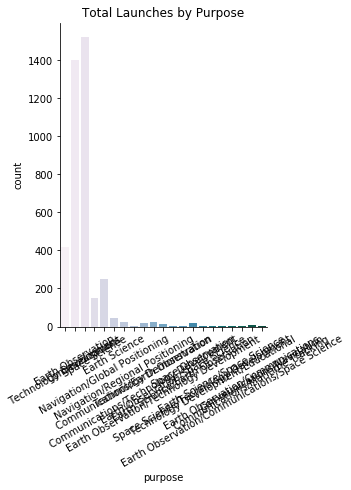

In [14]:
p = sns.catplot("purpose",kind="count",data=purpose,palette=cmap)
p.set_xticklabels(rotation=30)
plt.title("Total Launches by Purpose")
plt.show()

In [15]:
purpose["purpose"] = purpose["purpose"].replace(
    {'Navigation/Global Positioning':'Navigation','Navigation/Regional Positioning':'Navigation',
    'Communications/Technology Development':'Communications','Earth Observation/Technology Development':'Earth Observation',
    'Communications/Maritime Tracking':'Communications','Earth Science/Earth Observation':'Earth Science',
    'Earth Observation/Communications':'Earth Observation','Technology Development/Educational':'Technology Development',
    'Earth Observation/Space Science':'Earth Observation','Earth Observation/Communications/Space Science':'Earth Observation',
    'Communications/Navigation':'Communications','Earth Science/Space Science':'Earth Science',
    'Earth Science/Space Science':'Earth Science','Earth Science/Space Science':'Earth Science',
    'Space Science/Technology Development':'Space Science','Communications/Earth Observation':'Communications',})

In [16]:
purpose["purpose"].value_counts()

Communications              1554
Earth Observation           1420
Technology Development       422
Navigation                   274
Space Science                152
Earth Science                 50
Technology Demonstration      24
Space Observation             18
Name: purpose, dtype: int64

In [17]:
purposegroup = purpose.groupby(["purpose","Year"])["Year"].count()

# Convert to DataFrame
purposedf = pd.DataFrame(purposegroup)

# # Minor Data Munging to Re-Format the Data Frames
pdf = purposedf.unstack(level=0)
pdf.columns = [x[1] for x in pdf.columns]

pdf.head()

,Communications,Earth Observation,Earth Science,Navigation,Space Observation,Space Science,Technology Demonstration,Technology Development
Year,,,,,,,,
1974,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1991,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


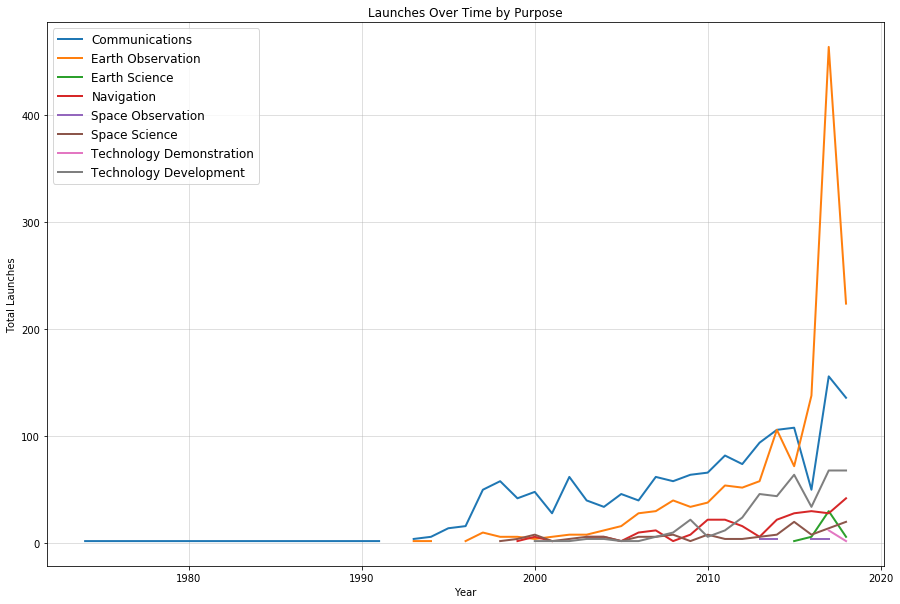

In [18]:
plt.figure(figsize = (15,10))
plt.grid(b=True)

for column in pdf:
    plt.plot(pdf.index, pdf[column],linewidth=2)

#Incorporate the other graph properties    
plt.xlabel("Year")
plt.ylabel("Total Launches")
plt.grid(True,alpha=.5)
plt.title("Launches Over Time by Purpose")
plt.legend(loc=2, fontsize="large")

# Save the Figure

plt.show()

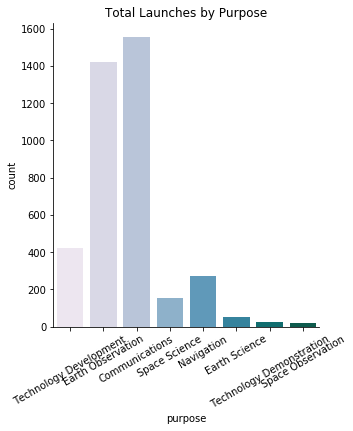

In [19]:
p = sns.catplot("purpose",kind="count",data=purpose,palette=cmap)
p.set_xticklabels(rotation=30)
plt.title("Total Launches by Purpose")
plt.show()

In [20]:
user = pd.read_sql_query('SELECT * FROM ucs_satellites;', con=engine)
user["Year"] = user['launch_date'].map(lambda x: int(x.strftime('%Y')))
user["users"] = user["users"].str.strip()

user = user[user["Year"] != 2019]


user["users"].value_counts()

Commercial                        1692
Government                         770
Military                           604
Civil                              290
Government/Commercial              242
Military/Commercial                144
Military/Government                 90
Government/Civil                    56
Government/Military                 10
Military/Civil                       6
Civil/Government                     4
Commercial/Military                  4
Government/Commercial/Military       2
Name: users, dtype: int64

In [21]:
usergroup = user.groupby(["users","Year"])["Year"].count()

# Convert to DataFrame
userdf = pd.DataFrame(usergroup)

# # Minor Data Munging to Re-Format the Data Frames
udf = userdf.unstack(level=0)
udf.columns = [x[1] for x in udf.columns]

udf.head()

,Civil,Civil/Government,Commercial,Commercial/Military,Government,Government/Civil,Government/Commercial,Government/Commercial/Military,Government/Military,Military,Military/Civil,Military/Commercial,Military/Government
Year,,,,,,,,,,,,,
1974,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1990,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


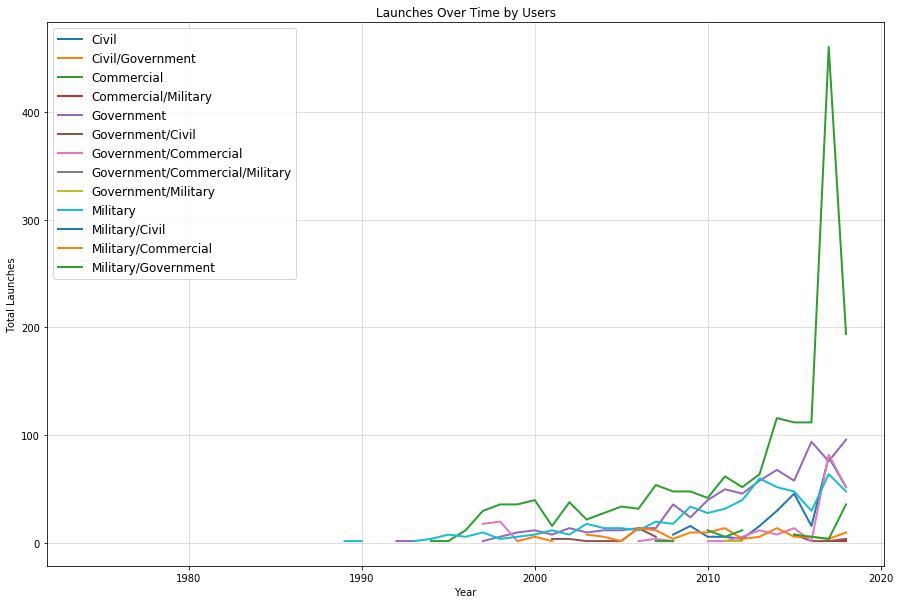

In [22]:
plt.figure(figsize = (15,10))
plt.grid(b=True)

for column in udf:
    plt.plot(udf.index, udf[column],linewidth=2)

#Incorporate the other graph properties    
plt.xlabel("Year")
plt.ylabel("Total Launches")
plt.grid(True,alpha=.5)
plt.title("Launches Over Time by Users")
plt.legend(loc=2, fontsize="large")

# Save the Figure

plt.show()

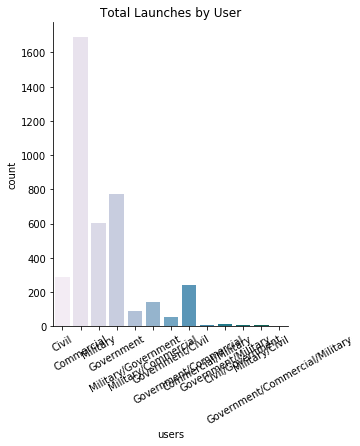

In [23]:
p = sns.catplot("users",kind="count",data=user,palette=cmap)
p.set_xticklabels(rotation=30)
plt.title("Total Launches by User")
plt.show()